# **Political Violence in the G5 Sahel Countries (2018-2023)**

**An Application of ACLED’s Conflict Index Methodology**


```bash
Author : Aboubacar HEMA
Supervision : Wim MARIVOET
Contact : a.hema@cgiar.org / w.marivoet@cgiar.org
Role : Research Analyst at IFPRI
Year : 2023
```

-----------------
## **Objective**
-----------------

- To compute the **conflict diffusion indicator** per adm2/year by using ACLED’s Conflict Index Methodology , comprising the following steps: 
1. Create a spatial grid of 10km-by-10km 
2. Remove grid cells with less than 100 habitants using population data from WorldPop (pop_country)
3. Identify grid cells with at least 10 conflict events per year using events_diffusion layer
4. Compute the proportion of high violence grid cells to total cells per adm2/year


-----------------
## **Output**
-----------------

- [Political violence in the G5 Sahel Countries (2018-2023): An application of ACLED’s conflict index methodology](https://cgspace.cgiar.org/items/1d0dd9f6-e3b6-4be2-bc08-bd9a7171ee69) 

- [ACLED Conflict Index G5 Sahel (2018-2023)](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/T6UT9O)



-----------------
## **Dataset**
-----------------

* ``pop_sahel`` [Constrained individual countries 2020 UN adjusted (100-meter resolution)](https://www.worldpop.org/) datasets for Mauritania, Mali, Burkina Faso, Niger, and Chad. Given the midpoint reference of 2020, it is assumed that any demographic change between 2018 and 2023 will have only a minor effect on the estimated diffusion indicator
* ``sahel_adm2`` [UNOCHA Geographic dataset for Sahel (Administrative boundaries and settlements)](https://data.humdata.org/dataset/sahel-administrative-boundaries)
* ``events_diffusion`` 	[ACLED Curated dataset for Africa (5 January 2024)](https://acleddata.com/data-export-tool/)
* ``geometry`` the time stamp for drop-off



From ACLED site:

* ``Indicator`` Diffusion
* ``Measure`` What proportion of the country experiences a high level of violence?
* ``Significance`` Many conflicts can occur in a country simultaneously, adding to the geographic spread of conflict across states. This measure is an assessment of the geographic distribution of conflict. Each country is divided into a 10km-by-10km spatial grid. Grid cells that have a population of fewer than 100 people are excluded. Next, ACLED determines how many of a country’s geographic grid cells experience a high level of violence, defined as at least 10 events per year (representing the top 10% of cases).
* ``The Diffusion indicator represents the proportion of high violence grid cells to total cells (i.e. the percentage of geographic area experiencing high levels of violence)`` 

-----------------
## **Technical requirements**
-----------------


```bash
conda create -n gee python
conda activate gee
conda install -c conda-forge mamba
mamba install -c conda-forge pygis
pip install geemap
pip install ee
```

-----------------
## **Import the necessary libraries**
-----------------


In [ ]:
#%pip install pygis

In [2]:
import ee
import geemap

# Basic libraries of python for numeric and dataframe computations
import numpy as np                              
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt 

# Slightly advanced library for data visualization            
import seaborn as sns  

In [3]:
# Authenticate and Initialize Earth Engine
geemap.ee_initialize()

-----------------
## **Load data**
-----------------

In [4]:
pop_sahel = ee.Image("projects/ee-aboubacarhema94/assets/ACLED/Sahel_pop_2020_UNadj_constrained")
sahel_adm2 = ee.FeatureCollection("projects/ee-aboubacarhema94/assets/ACLED/G5_Sahel_adm2N")
geometry =ee.Geometry.Polygon(
        [[[-18.199748102330243, 28.38016082795913],
          [-18.199748102330243, 2.8095840714382856],
          [27.327595647669753, 2.8095840714382856],
          [27.327595647669753, 28.38016082795913]]], None, False)
events_diffusion_period = ee.FeatureCollection("projects/ee-aboubacarhema94/assets/ACLED/G5_Sahel_Diffusion_period")

In [5]:
period_1_min = '2017-10-01'
period_1_max = '2018-02-29'
period_2_min = '2018-03-01'
period_2_max = '2018-09-30'
period_3_min = '2018-10-01'
period_3_max = '2019-02-29'
period_4_min = '2019-03-01'
period_4_max = '2019-09-30'
period_5_min = '2019-10-01'
period_5_max = '2020-02-29'
period_6_min = '2020-03-01'
period_6_max = '2020-09-30'
period_7_min = '2020-10-01'
period_7_max = '2021-02-29'
period_8_min = '2021-03-01'
period_8_max = '2021-09-30'
period_9_min = '2021-10-01'
period_9_max = '2022-02-29'
period_10_min = '2022-03-01'
period_10_max = '2022-09-30'
period_11_min = '2022-10-01'
period_11_max = '2023-02-29'
period_12_min = '2023-03-01'
period_12_max = '2023-09-30'
period_13_min = '2023-10-01'
period_13_max = '2024-02-29'
period_14_min = '2024-03-01'
period_14_max = '2024-09-30'

period_1 = "Oct2017-Feb2018"
period_2 = "Mar2018-Sep2018"
period_3 = "Oct2018-Feb2019"
period_4 = "Mar2019-Sep2019"
period_5 = "Oct2019-Feb2020"
period_6 = "Mar2020-Sep2020"
period_7 = "Oct2020-Feb2021"
period_8 = "Mar2021-Sep2021"
period_9 = "Oct2021-Feb2022"
period_10 = "Mar2022-Sep2022"
period_11 = "Oct2022-Feb2023"
period_12 = "Mar2023-Sep2023"
period_13 = "Oct2023-Feb2024"
period_14 = "Mar2024-Sep2024"

In [7]:

period_min = period_1_min
period_max = period_1_max
period = period_1


pop_seuil = 50


nb_events = 3



In [8]:
# Extract the projection before doing any computation
projection = pop_sahel.projection()
projection.getInfo()


{'type': 'Projection',
 'crs': 'EPSG:4326',
 'transform': [0.000833333330003155,
  0,
  -17.06624991685372,
  0,
  -0.0008333333300088002,
  27.297916759268993]}

In [9]:
# Native Resolution:
projection.nominalScale()

In [10]:
pop_sahel_stats = geemap.image_stats(pop_sahel, scale=100)
pop_sahel_stats.getInfo()

{'max': {'b1': 4269.693359375},
 'mean': {'b1': 13.01768505881743},
 'min': {'b1': 0},
 'std': {'b1': 20.775038775581848},
 'sum': {'b1': 74382024.02896315}}

In [ ]:
'''
pop_sahel_stats = 'pop_sahel_stats.csv'
geemap.zonal_stats(
    pop_sahel,
    sahel_adm2,
    pop_sahel_stats,
    statistics_type='SUM',
    scale=100, 
    return_fc=False
)
'''

In [11]:
#Initialize a Map
Map = geemap.Map()
Map.centerObject(sahel_adm2)

In [12]:
# Set visualization/style parameters
sahel_adm2_style = {
    "fillColor": "00000000", # transparent color code
    "color": "black", # color of the stroke
    "width": 0.5 # stroke width
}

# Display the layer
Map.addLayer(sahel_adm2.style(**sahel_adm2_style), {}, " G5 Sahel Administrative two Boundaries")
Map

Map(center=[17.369569793340958, 3.4630404598133353], controls=(WidgetControl(options=['position', 'transparent…

In [13]:
# To preview first five rows. 
def preview(df, n=5):
    """return n rows that have fewest number of nulls"""
    order = df.isnull().sum(axis=1).sort_values().head(n).index
    return df.loc[order]

# View the Datasets
df_sahel_adm2 = geemap.ee_to_df(sahel_adm2, sort_columns=True)

preview(df_sahel_adm2, 10)

,ADMIN0NAME,ADMIN0PCOD,ADMIN1NAME,ADMIN1PCOD,ADMIN2NAME,ADMIN2PCOD,INITIAL,OBJECTID,Shape_Area,Shape_Leng
0,Burkina Faso,BF,Boucle du Mouhoun,BF46,Bale,BF4601,49,1,0.376722,4.830069
176,Mauritania,MR,Brakna,MR03,Boghe,MR0303,155,177,0.141859,2.621931
177,Mauritania,MR,Brakna,MR03,M'Bagne,MR0305,148,178,0.056010,1.128084
178,Mauritania,MR,Brakna,MR03,Maghta Lahjar,MR0304,178,179,1.177650,4.641148
179,Mauritania,MR,Dakhlet Nouadhibou,MR04,Chami,MR0402,285,180,1.960411,12.939259
180,Mauritania,MR,Dakhlet Nouadhibou,MR04,Nouadhibou,MR0401,284,181,1.314143,6.941920
181,Mauritania,MR,Gorgol,MR05,Kaedi,MR0501,147,182,0.352751,3.095653
182,Mauritania,MR,Gorgol,MR05,M'Bout,MR0503,149,183,0.464840,3.419231
183,Mauritania,MR,Gorgol,MR05,Maghama,MR0502,137,184,0.197272,2.483626
184,Mauritania,MR,Gorgol,MR05,Monguel,MR0504,158,185,0.147683,1.892978


In [14]:
#Let's check the first five rows of the data
df_sahel_adm2.head()

,ADMIN0NAME,ADMIN0PCOD,ADMIN1NAME,ADMIN1PCOD,ADMIN2NAME,ADMIN2PCOD,INITIAL,OBJECTID,Shape_Area,Shape_Leng
0,Burkina Faso,BF,Boucle du Mouhoun,BF46,Bale,BF4601,49,1,0.376722,4.830069
1,Burkina Faso,BF,Boucle du Mouhoun,BF46,Banwa,BF4602,66,2,0.490583,5.015746
2,Burkina Faso,BF,Boucle du Mouhoun,BF46,Kossi,BF4603,90,3,0.622852,4.115810
3,Burkina Faso,BF,Boucle du Mouhoun,BF46,Mouhoun,BF4604,67,4,0.571324,5.523416
4,Burkina Faso,BF,Boucle du Mouhoun,BF46,Nayala,BF4605,76,5,0.309684,2.757532


In [15]:
# Checking the info of the dataset
df_sahel_adm2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ADMIN0NAME  279 non-null    object 
 1   ADMIN0PCOD  279 non-null    object 
 2   ADMIN1NAME  279 non-null    object 
 3   ADMIN1PCOD  279 non-null    object 
 4   ADMIN2NAME  279 non-null    object 
 5   ADMIN2PCOD  279 non-null    object 
 6   INITIAL     279 non-null    int64  
 7   OBJECTID    279 non-null    int64  
 8   Shape_Area  279 non-null    float64
 9   Shape_Leng  279 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 21.9+ KB


<Axes: xlabel='ADMIN0PCOD'>

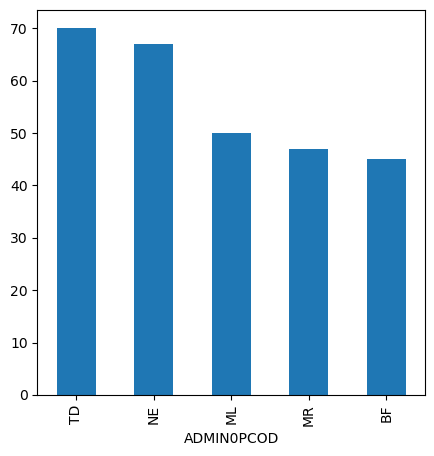

In [16]:
# Plotting countplot for admin0Pcod (G5 Sahel Countries)
df_sahel_adm2.ADMIN0PCOD.value_counts().sort_values(ascending=False).plot(kind='bar' ,figsize=(5,5))

In [18]:
# Plotting countplot for admin2Pcod (G5 Sahel Countries)
#df_sahel_adm2.admin2Pcod.value_counts().sort_values(ascending=False).plot(kind='bar' ,figsize=(20,8))
# 
df_sahel_adm2.ADMIN0PCOD.value_counts()

ADMIN0PCOD
TD    70
NE    67
ML    50
MR    47
BF    45
Name: count, dtype: int64

In [19]:
df_events_diffusion = geemap.ee_to_df(events_diffusion_period, sort_columns=True)


In [20]:
#Let's check the first five rows of the data
df_events_diffusion.head()


,actor1,actor2,admin0Name,admin0Pcod,admin1,admin1Name,admin1Pcod,admin2,admin2Na_1,admin2Name,...,longitude,period,region,source,source_sca,sub_event_,tags,time_preci,timestamp,year
0,Mutiny of Military Forces of Burkina Faso (201...,Military Forces of Burkina Faso (2015-2022),Burkina Faso,BF,Centre,Centre,BF13,Kadiogo,Kadiogo,Kadiogo,...,-1.5247,Oct2021-Feb2022,Western Africa,AIB (Burkina Faso); Burkina24; Jeune Afrique; ...,New media-Subnational,Armed clash,,1,1702343240,2022
1,Military Forces of Burkina Faso (2022-),,Burkina Faso,BF,Boucle du Mouhoun,Boucle du Mouhoun,BF46,Kossi,Kossi,Kossi,...,-3.7285,Mar2022-Sep2022,Western Africa,Undisclosed Source; Facebook,Local partner-Other,Air/drone strike,,1,1663010290,2022
2,Military Forces of Burkina Faso (2022-),,Burkina Faso,BF,Boucle du Mouhoun,Boucle du Mouhoun,BF46,Nayala,Nayala,Nayala,...,-2.9833,Mar2022-Sep2022,Western Africa,AIB (Burkina Faso); Facebook; Undisclosed Source,Local partner-Other,Air/drone strike,,1,1702343220,2022
3,Military Forces of Burkina Faso (2015-2022),Military Forces of Burkina Faso (2015-2022),Burkina Faso,BF,Boucle du Mouhoun,Boucle du Mouhoun,BF46,Sourou,Sourou,Sourou,...,-3.1985,Mar2021-Sep2021,Western Africa,Undisclosed Source,Local partner-Other,Air/drone strike,,1,1675727770,2021
4,Police Forces of Burkina Faso (2022-),Military Forces of Burkina Faso (2022-),Burkina Faso,BF,Centre-Nord,Centre-Nord,BF49,Sanmatenga,Sanmatenga,Sanmatenga,...,-1.0844,Mar2022-Sep2022,Western Africa,Undisclosed Source,Local partner-Other,Armed clash,,1,1653327030,2022


In [21]:
# Checking the info of the dataset
df_events_diffusion.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16578 entries, 0 to 16577
Data columns (total 40 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   actor1      16578 non-null  object 
 1   actor2      16578 non-null  object 
 2   admin0Name  16578 non-null  object 
 3   admin0Pcod  16578 non-null  object 
 4   admin1      16578 non-null  object 
 5   admin1Name  16578 non-null  object 
 6   admin1Pcod  16578 non-null  object 
 7   admin2      16578 non-null  object 
 8   admin2Na_1  16578 non-null  object 
 9   admin2Name  16578 non-null  object 
 10  admin2Pc_1  16578 non-null  object 
 11  admin2Pcod  16578 non-null  object 
 12  admin3      16578 non-null  object 
 13  assoc_ac_1  16578 non-null  object 
 14  assoc_acto  16578 non-null  object 
 15  civilian_t  16578 non-null  object 
 16  country     16578 non-null  object 
 17  disorder_t  16578 non-null  object 
 18  event_date  16578 non-null  int64  
 19  event_id_c  16578 non-nul

<Axes: xlabel='admin0Pcod'>

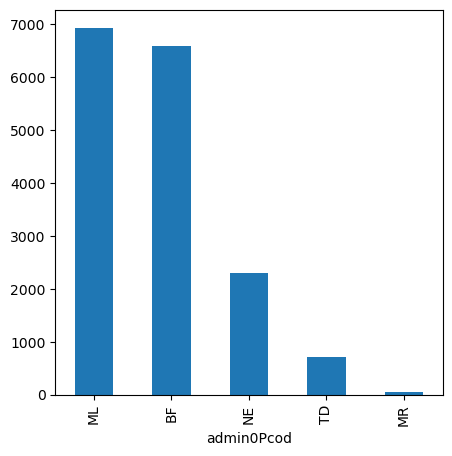

In [22]:

# Plotting countplot for admin0Pcod (G5 Sahel Countries)
df_events_diffusion.admin0Pcod.value_counts().sort_values(ascending=False).plot(kind='bar' ,figsize=(5,5))


In [23]:
df_events_diffusion.admin0Pcod.value_counts()

admin0Pcod
ML    6922
BF    6586
NE    2306
TD     713
MR      51
Name: count, dtype: int64

In [24]:
# Use style() to visualize the points
eventsStyled = {
    'color': 'red',
    'pointSize': 1,
    'pointShape': 'triangle',
    'width': 1,
}

Map.addLayer(events_diffusion_period.style(**eventsStyled), {}, "conflict events from 2018 to 2023")
Map

Map(bottom=3995.0, center=[17.369569793340958, 3.4630404598133353], controls=(WidgetControl(options=['position…

In [25]:
# Add Population Sahel layer
viz_pop = { # Set visualization parameters
  'min': 0.0,
  'max': 4270.0,
  'palette': ['24126c', '1fff4f', 'd4ff50'],
}
Map.addLayer(pop_sahel,viz_pop,'Population Sahel', True, 1)

Map

Map(bottom=3995.0, center=[17.369569793340958, 3.4630404598133353], controls=(WidgetControl(options=['position…

-----------------
## **Start conflict diffusion indicator per period computation**
-----------------



-----------------
### **1. Create a spatial grid of 10km-by-10km (Population Sahel)**
-----------------


In [26]:
# ****** Aggregation to 10km ****** #
country_pop = pop_sahel

# Get the projection at required scale
projectionAt1k = projection.atScale(1000)
projectionAt10k = projection.atScale(10000)

# Step1: 100m to 1000m
country_popAt1k = country_pop \
  .reduceResolution(**{
    'reducer': ee.Reducer.sum().unweighted(),
    'maxPixels': 1024
  }) \
  .reproject(**{
    'crs': projectionAt1k
  })
# Step2: 1000m to 10000m
country_popAt10k = country_popAt1k \
  .reduceResolution(**{
    'reducer': ee.Reducer.sum().unweighted(),
    'maxPixels': 1024
  }) \
  .reproject(**{
    'crs': projectionAt10k
  })

In [27]:
country_popAt1k_stats = geemap.image_stats(country_popAt1k, scale=1000)
country_popAt1k_stats.getInfo()

{'max': {'b1': 67297.87694835663},
 'mean': {'b1': 657.2242802944393},
 'min': {'b1': 0},
 'std': {'b1': 637.830157259124},
 'sum': {'b1': 37681923.182533026}}

In [ ]:
##country_popAt10k_stats = geemap.image_stats(country_popAt10k, scale=10000)
##country_popAt10k_stats.getInfo()

In [28]:
Map.addLayer(country_popAt1k.clip(sahel_adm2), viz_pop, 'Population Sahel 1km', 1)
Map.addLayer(country_popAt10k.clip(sahel_adm2), viz_pop, 'Population Sahel 10km', 1)
Map

Map(bottom=3995.0, center=[17.369569793340958, 3.4630404598133353], controls=(WidgetControl(options=['position…


-----------------
### **2. Remove grid cells with less than (pop_seuil) inhabitants using population data (pop_sahel)**
-----------------


In [30]:
country_popAt10k_100 = country_popAt10k.gte(pop_seuil)
country_popAt10k_100_viz = country_popAt10k_100.updateMask(country_popAt10k_100.neq(0))
bin = {'min': 0, 'max': 1, 'palette': ['red', 'green']}
Map.addLayer(country_popAt10k_100_viz, bin, 'grid cells with more than (pop_seuil) inhabitants in 10km' , 1)
Map

Map(bottom=3995.0, center=[17.369569793340958, 3.4630404598133353], controls=(WidgetControl(options=['position…

In [31]:
country_popAt10k_100 = country_popAt10k_100_viz.unmask(0).rename('grid_cells_gte_threshold_inhabitants')


-----------------
### **3. Identify grid cells with at least (nb_events) conflict events per year using events_diffusion layer**
-----------------


-----------------
#### **3.1 Number of Conflict events for the specific year**
-----------------

In [32]:
events = events_diffusion_period.aggregate_count('event_type')
events.getInfo()

16578

In [33]:
events_diffusion_year_period = events_diffusion_period

def func_izg(feature):
    num = ee.Number.parse(feature.get('event_date'))
    readableDate = ee.Date(num)
    stringDate = readableDate.format("YYYY-MM-dd")
    return feature.set('Date', stringDate)


events_diffusion_year_period = ee.FeatureCollection(events_diffusion_year_period).map(func_izg)

events_diffusion_period_needed = events_diffusion_year_period \
.filter(ee.Filter.gte('Date', period_min)) \
.filter(ee.Filter.lte('Date', period_max ))



In [34]:
events = events_diffusion_period_needed.aggregate_count('event_type')
events.getInfo()

242

3.2 Vizualise Conflict event layer

In [35]:
# Use style() to visualize the points
eventsStyled = {
    'color': 'red',
    'pointSize': 1,
    'pointShape': 'triangle',
    'width': 3,
}

Map.addLayer(events_diffusion_period_needed.style(**eventsStyled), {}, "conflict events")
Map

Map(bottom=3995.0, center=[17.369569793340958, 3.4630404598133353], controls=(WidgetControl(options=['position…

-----------------
#### **3.3 Create image from conflict events layer**
-----------------

In [36]:
#/ add dummy property to use for reduceToImage

def func_dlg(feature):
  return feature.set('dummy',1)

if_events = ee.FeatureCollection(events_diffusion_period_needed).map(func_dlg)

In [37]:
eventsImg = if_events.reduceToImage(['dummy'], ee.Reducer.sum().unweighted()) \
  .unmask(0) \
  .reproject('epsg:4326', None, 10000) \
  .clip(geometry)


In [38]:
eventsImg_stats = geemap.image_stats(eventsImg, scale=10000)
eventsImg_stats.getInfo()

{'max': {'sum': 13},
 'mean': {'sum': 0.0016774647627744756},
 'min': {'sum': 0},
 'std': {'sum': 0.07047144897363503},
 'sum': {'sum': 242}}

In [39]:
viz_events = {
  'min': 0.0,
  'max': 34.0,
  'palette': [
    "00ff00","1A492C","071EC4","B5CA36","729EAC","8EA5DE",
    "818991","62A3C3","CCF4FE","74F0B9","yellow","C72144",
    "56613B","C14683","C31C25","5F6253","11BF85","A61B26",
    "99FBC5","188AAA","C2D7F1","B7D9D8","856F96","109C6B",
    "2DE3F4","9A777D","151796","C033D8","510037","640C21",
    "31A191","223AB0","B692AC","2DE3F4",
  ]
}
eventsImg_viz = eventsImg.updateMask(eventsImg.neq(0))
Map.addLayer(eventsImg_viz.clip(sahel_adm2), viz_events , 'Number of Conflict event',1)
Map

Map(bottom=3995.0, center=[17.369569793340958, 3.4630404598133353], controls=(WidgetControl(options=['position…

In [ ]:
events_sahel_stats = 'events_sahel_stats.csv'
geemap.zonal_stats(
    eventsImg,
    sahel_adm2,
    events_sahel_stats,
    statistics_type='SUM',
    scale=10000, 
    return_fc=False
)

-----------------
#### **3.4 Identify grid cells with at least (nb_events) conflict events**
-----------------

In [40]:
grid_cells = country_popAt10k_100.multiply(eventsImg)
grid_cells_needed = grid_cells.gte(nb_events)
grid_cells_needed_viz = grid_cells_needed.updateMask(grid_cells_needed.neq(0))
Map.addLayer(grid_cells_needed_viz.clip(sahel_adm2), bin, 'grid cells needed', 1)
Map

Map(bottom=3995.0, center=[17.369569793340958, 3.4630404598133353], controls=(WidgetControl(options=['position…

In [41]:
grid_cells_needed = grid_cells_needed_viz.unmask(0).rename('grid_cells_needed')


-----------------
## **4 Compute the proportion of high violence grid cells to total cells per adm2**
-----------------

-----------------
#### **4.1**
-----------------

In [43]:
stacked_image = grid_cells_needed.addBands(country_popAt10k_100)
#Create a function to calculate the feature class with ADM2 Name
def calculateFeatureSum(feature):
    events = stacked_image.reduceRegion(**{
    'reducer': ee.Reducer.sum().unweighted(),
    'geometry': feature.geometry(),#.buffer(10),
    'scale': projectionAt10k.nominalScale(),
    'maxPixels': 1e20
    })
    adm_level = feature.get('ADMIN2PCOD')
    return ee.Feature(
      feature.geometry(),
      events.set('ADMIN2PCOD', adm_level))

In [44]:
#Map Function to Create
Feature_byADM2 = sahel_adm2.map(calculateFeatureSum)
#geemap.ee_to_csv(Feature_byADM2, filename='conflict_diffusion_indicator.csv')

In [45]:
df_Feature_byADM2 = geemap.ee_to_df(Feature_byADM2, sort_columns=True)


In [46]:
df_Feature_byADM2.head()

,ADMIN2PCOD,grid_cells_gte_threshold_inhabitants,grid_cells_needed
0,BF4601,49,0
1,BF4602,60,0
2,BF4603,76,0
3,BF4604,70,0
4,BF4605,40,0


In [47]:
# Checking the info of the dataset
df_Feature_byADM2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   ADMIN2PCOD                            279 non-null    object
 1   grid_cells_gte_threshold_inhabitants  279 non-null    int64 
 2   grid_cells_needed                     279 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.7+ KB


-----------------
#### **4.2 Compute the proportion of high violence grid cells to total cells per adm2**
-----------------

In [48]:
def indicator(feature):
  #
  val = ee.Number(feature.get('grid_cells_needed')).divide(ee.Number(feature.get('grid_cells_gte_threshold_inhabitants')))
  return feature.set('conflict_diffusion_indicator', val)

Feature_byADM2 = Feature_byADM2.map(indicator)

In [49]:
df_indicator_Feature_byADM2 = geemap.ee_to_df(Feature_byADM2, sort_columns=True)

In [50]:
df_indicator_Feature_byADM2.head()

,ADMIN2PCOD,conflict_diffusion_indicator,grid_cells_gte_threshold_inhabitants,grid_cells_needed
0,BF4601,0.0,49,0
1,BF4602,0.0,60,0
2,BF4603,0.0,76,0
3,BF4604,0.0,70,0
4,BF4605,0.0,40,0


In [51]:
# Checking the info of the dataset
df_indicator_Feature_byADM2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ADMIN2PCOD                            279 non-null    object 
 1   conflict_diffusion_indicator          279 non-null    float64
 2   grid_cells_gte_threshold_inhabitants  279 non-null    int64  
 3   grid_cells_needed                     279 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 8.8+ KB


In [52]:
left_layer = geemap.ee_tile_layer(country_popAt10k_100_viz, bin, 'grid cells with more than (pop_seuil) inhabitants in 10km' , 1)
right_layer = geemap.ee_tile_layer(grid_cells_needed_viz.clip(sahel_adm2), bin, 'grid cells needed', 1)

Map = geemap.Map()
Map.centerObject(sahel_adm2)
Map.split_map(left_layer, right_layer)
Map

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

-----------------
## **Export to CSV**
-----------------

In [53]:
geemap.ee_to_csv(Feature_byADM2, filename='conflict_diffusion_indicator_per_period.csv')

In [69]:

snippet = """
print('Number of Conflict events',
      events_diffusion_year_period.aggregate_count('event_type'));
"""

geemap.js_snippet_to_py(snippet, add_new_cell=True, import_ee=False)
